In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

In [2]:
def gen_data(n_norm, n_outs_up, n_outs_down, loc, out_scale, noise_scale):
    
    norm = np.zeros(n_norm) + loc + np.random.normal(scale=noise_scale, size=n_norm)
    outs_up = np.zeros(n_outs_up) + loc + out_scale + np.random.normal(scale=noise_scale, size=n_outs_up)
    outs_down = np.zeros(n_outs_down) + loc - out_scale + np.random.normal(scale=noise_scale, size=n_outs_down)

    return pd.Series(np.append(np.append(norm, outs_down), outs_up))

In [3]:
def descent_std_cut(series, max_outs=0.05, step=1, threshold=1.):
    n = len(series)
    
    iname = '' if series.index.name is None else series.index.name
    name = 0 if series.name is None else series.name
    
    t = series.sort_values(ascending=False).reset_index()

    start = 0
    stop = int(n*max_outs)

    stds = pd.Series([t[name][i:].std() for i in np.arange(start, stop) if i%step==0])
    stds = stds.shift(-1) - stds
    stds = (stds.shift(-1) - stds) / (series.max() - series.median()) * n
    
    if stds.max() < threshold:
        return None

    t = t.iloc[:stds[stds == stds.max()].index[0] + 1]
    
    t.index = t['index']
    t.index.name = iname
    t = t.drop(columns=['index'])
    return t

In [38]:
def descent_std_cut(series, max_outs=0.02, step=1, threshold=1.):
    n = len(series)
    
    iname = '' if series.index.name is None else series.index.name
    name = 0 if series.name is None else series.name
    
    series = abs(series - series.median())
    
    t = series.sort_values(ascending=False).reset_index()
#     t = abs(t - t.median())

    start = 0
    stop = int(n*max_outs)

    stds = pd.Series([t[name][i:].std() for i in np.arange(start, stop) if i%step==0])
    stds.plot()
    stds = stds.shift(-1) - stds
    stds = (stds.shift(-1) - stds) / (series.max() - series.median()) * n
    
    if stds.max() is np.nan:
        return 0, None
    
    outlier_estimates = stds[stds > threshold]
    
    if stds.max() < threshold:
        return stds.max(), None

    
    
    t = t.iloc[:outlier_estimates.index[-1] + 1]
    
    t.index = t['index']
    t.index.name = iname
    t = t.drop(columns=['index'])
    return outlier_estimates.iloc[0], t.index

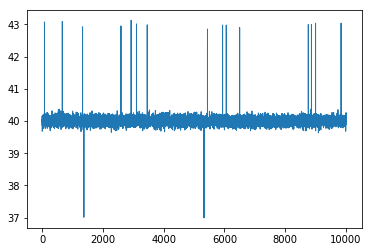

In [31]:
n_norm = 10000
n_outs_up = 15
n_outs_down = 3
loc = 40
out_scale = 3

data = gen_data(n_norm, n_outs_up, n_outs_down, loc, out_scale, 0.1)
# data = abs(data - data.median())
# data = pd.Series(minmax_scale(data))
# data = data.append(pd.Series([1]*55), ignore_index=True)
np.random.shuffle(data)
plt.plot(data.index, data, lw=1, alpha=1)

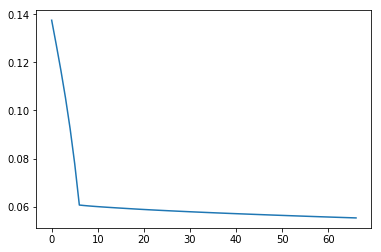

In [63]:
t = data.sort_values(ascending=False).reset_index()[0]
start = 0
stop = int(len(data))
step = 1

est, outls = descent_std_cut(data, step=3)
# plt.plot(range(stop//step), [median_metric(t[i+start:], need_down=False)[1] for i in range(start,stop) if i%step==0]);
# t.plot(xlim=(start,stop))

# print(s2.sort_values(ascending=False).head(5))

6

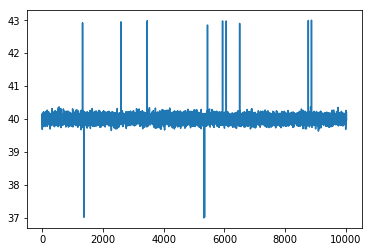

In [64]:
data.drop(outls).plot()
len(outls)

In [16]:
est

14.127638817530775

In [491]:
t2 = pd.DataFrame(t)
t2 = 1

In [493]:
t2

,0
0,41.131163
1,41.110180
2,41.079623
3,41.060374
4,41.053970
5,41.022520
6,41.009903
7,40.992547
8,40.985238
9,40.973961


In [417]:
data.sort_values(ascending=False).reset_index()

,index,0
0,4888,41.131163
1,6609,41.110180
2,7630,41.079623
3,1024,41.060374
4,9887,41.053970
5,978,41.022520
6,2904,41.009903
7,7425,40.992547
8,5032,40.985238
9,7025,40.973961


In [414]:
pd.DataFrame(data)[0]

0

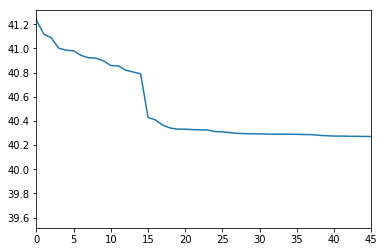

In [369]:
t = data.sort_values(ascending=False).reset_index()[0]
start = 0
stop = n_outs_up + 30
step = 1

# plt.plot(range(stop//step), [median_metric(t[i+start:], need_down=False)[1] for i in range(start,stop) if i%step==0]);
t.plot(xlim=(start,stop))

In [382]:
%%timeit
stds = [t[i:].std() for i in range(start, stop) if i%step==0]
# plt.plot(range(start,stop,step), stds)
# plt.xlim(start,stop)
# plt.figure()

87.6 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [384]:
%%timeit
meds = [median_metric(t[i:], need_down=False)[1] for i in range(start, stop) if i%step==0]
# plt.plot(range(start,stop,step), meds, c='C1')
# plt.xlim(start,stop)

338 ms ± 149 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.8734188240876708


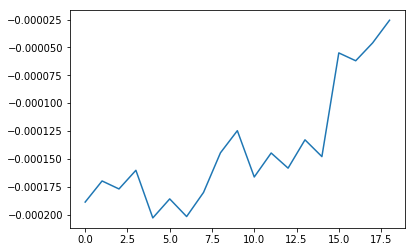

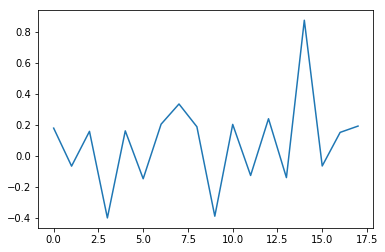

In [379]:
stdsSer = pd.Series(meds)
stdsSer = stdsSer.shift(-1) - stdsSer
s2 = (stdsSer.shift(-1) - stdsSer) / (t.max() - t.median()) * len(t)
print(s2.max())

stdsSer.plot()
plt.figure()
s2.plot()

# >0.015
# wuth outs = 0.098
# больше выбросов - меньше
# меньше разброс - меньше

## Edarsf

(0, 45)

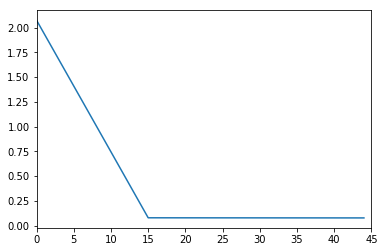

In [356]:
meds = [median_metric(t[i:])[1] for i in range(start, stop) if i%step==0]
plt.plot(range(start,stop,step), meds)
plt.xlim(start,stop)

In [224]:
data = gen_data(n , n_outs).sort_values(ascending=False)
data.index = np.arange(len(data))
print(data.std())
data = data.drop(0)
print(data.std())

0.5068375507130096
0.4996594680133976


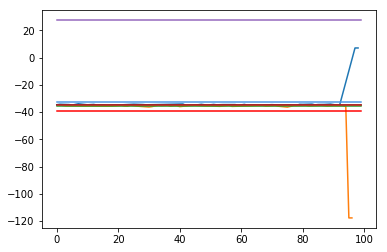

In [430]:
mean = data.mean()
median = data.median()

up = data[data > median]
down = data[data < median]
up.plot()
down.plot()

plt.plot(range(n), n*[median], c='k')
plt.plot(range(n), n*[up.mean()], c=(0.3,0.6,0.9))
plt.plot(range(n), n*[down.mean()], c='r')
plt.plot(range(n), n*[down.median()])
plt.plot(range(n), n*[up.median()])
plt.plot(range(n), n*[abs(mean + up.std())])

## MEDIAN

In [355]:
def median_metric(series, need_up=True, need_down=True):
    median = series.median()
    
    down_outs, up_outs = None, None
    
    if need_down is True:
        down = series[series < median]
        down_outs = abs((down.mean() - median))
        
    if need_up is True:
        up = series[series > median]
        up_outs = abs((up.mean() - median))
        
    return down_outs, up_outs

In [451]:
def median_cut(series):
    # save indexes
    col = series.name
    if col is None:
        col=0
    data = pd.DataFrame(series.sort_values())
    data[''] = data.index
    data.index = range(len(data))
    
    # method
    i = 0
    while median_metric(data[col].loc[i:])[0] > 1.:
        i+=1
    
    k = len(data)
    while median_metric(data[col].loc[i:k])[1] > 1.:
        k-=1
    
    data = data.loc[i:k]
    
    # load indexes
    data.index = data['']
    data = data.drop(columns=['']).sort_index()
    return data

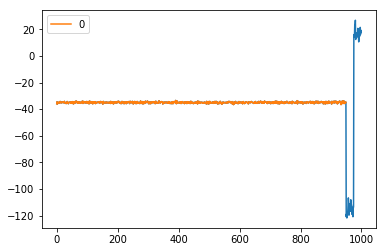

In [450]:
data = gen_data(1000, 50)
ax = data.plot()
median_cut(data).plot(ax=ax)

array([-0.78283263, -6.0281891 , -7.01367471, -7.05191394, -6.86664893,
       -6.81017716, -6.56162445, -6.25789597, -6.0511332 , -5.87839618,
       -5.58537686, -5.49511748, -5.32910274, -5.25138362, -5.01966792,
       -4.89473077, -4.74744658, -4.63820716, -4.61561883, -4.44881627,
       -4.37076182, -4.28111785, -4.17825043, -4.13107503, -4.03796618,
       -3.9899639 , -3.92300825, -3.85272551, -3.7830886 , -3.75422696])

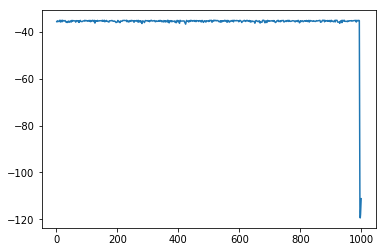

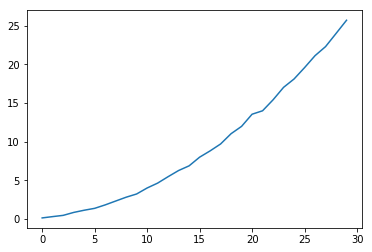

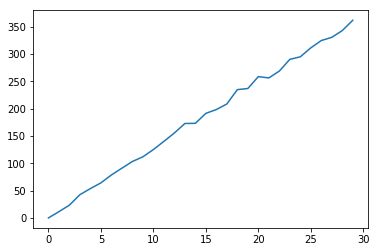

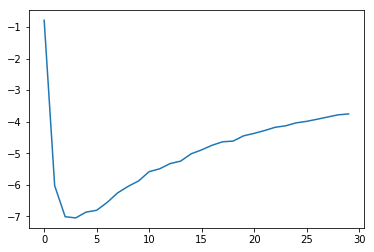

In [361]:
m = [[],[],[]]
n = 1000
for n_outs in np.arange(0, 30):
    data = gen_data(n , n_outs)
#     data = pd.Series(minmax_scale(data))

    median = data.median()

#     up = data[data > median]
    up = data[data < median]
    
    if n_outs == 5:
        up.plot()


    m[0].append((up.mean() - median)**2)
    m[1].append(up.std()**2)
    m[2].append((up.std())/((up.mean() - median)))



for i in range(len(m)):
    plt.figure()
    plt.plot(range(len(m[i])), m[i])
np.array(m[2])

## CUT

18


982

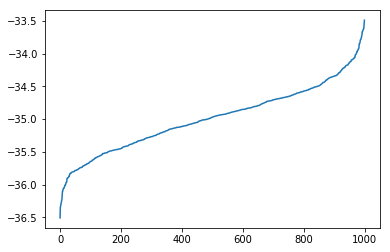

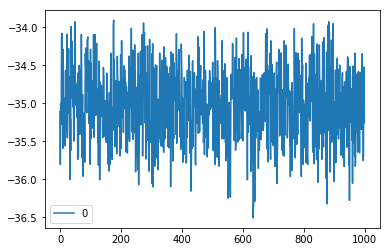

In [347]:
def cut_iters(series, max_outs=1, threshold=0.9):
    # save indexes
    col = series.name
    if col is None:
        col=0
    data = pd.DataFrame(series.sort_values(ascending=False))
    data[''] = data.index
    data.index = range(len(data))
    
    n_outs = -1
    
    for out in range(0, round(len(data)*max_outs)):
        s_last = data[col].loc[out:].std()
        s_new = data[col].loc[out+1:].std()
        s_delta = s_last - s_new
        if out != 0:
            if (s_delta/s_delta_last < threshold):
                n_outs = out
                print(n_outs)
                break
        s_delta_last = s_last - s_new
    
    if n_outs != -1:
        data = data.drop(range(out))
    
    # load indexes
    data.index = data['']
    data = data.drop(columns=['']).sort_index()
    return data


data = gen_data(1000 , 0)
plt.plot(range(len(data)), data.sort_values())
c = cut_iters(data)
c.plot()
len(c)

In [340]:
data.sort_values()

969   -36.570349
554   -36.348173
59    -36.312683
192   -36.281147
235   -36.274675
560   -36.236501
644   -36.227278
276   -36.215498
335   -36.211781
366   -36.190061
476   -36.177914
303   -36.142393
300   -36.129724
337   -36.110290
106   -36.080142
626   -36.079656
632   -36.077839
18    -36.077734
72    -36.075905
9     -36.072145
92    -36.069332
245   -36.068768
99    -36.023355
857   -36.009855
676   -36.006669
967   -35.990455
848   -35.988779
804   -35.978238
21    -35.963354
973   -35.950919
         ...    
412   -34.010683
984   -34.009238
258   -34.001803
663   -33.994236
449   -33.989014
650   -33.983730
495   -33.974907
30    -33.963644
652   -33.962364
47    -33.956166
645   -33.955573
241   -33.930847
29    -33.907624
88    -33.902358
280   -33.899239
694   -33.879062
799   -33.861182
301   -33.847760
456   -33.824096
923   -33.800095
96    -33.784021
726   -33.783178
248   -33.773362
704   -33.639121
64    -33.634794
296   -33.608837
85    -33.573036
734   -33.5321

In [273]:
pd.DataFrame(data).drop(2)

,0
0,-34.815117
1,-34.696490
3,-35.399773
4,-35.630514
5,-33.662698
6,-34.691480
7,-34.254756
8,-35.015406
9,-35.880054
10,-35.280333


0    51.686769
1    51.529195
2    47.426034
3    43.735506
dtype: float64
4
5


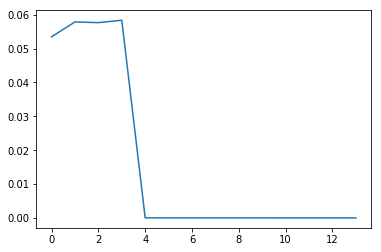

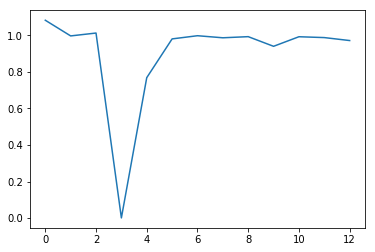

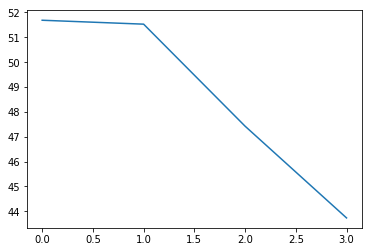

In [257]:
m = [[],[]]
n = 100000
for n_outs in np.arange(4, 5):
    data = gen_data(n , n_outs)
    data = data.sort_values(ascending=False)
    data.index = np.arange(len(data))
    data_c = data.copy()
    
    print(data.head(4))
    
    for out in range(n_outs+10):
        s_last = data.std()
        data = data.drop(out)
        s_new = data.std()
        m[0].append(s_last-s_new)
    
    
    data = data_c
    
    
    for out in range(0, n_outs+10):
        s_last = data.std()
        data = data.drop(out)
        s_new = data.std()
        s_delta = s_last-s_new
        if out != 0:
            m[1].append(s_delta/s_delta_last)
            if (m[1][-1]<0.8):
                print(out)
        s_delta_last = s_last-s_new



for i in range(len(m)):
    plt.figure()
    plt.plot(range(len(m[i])), m[i])
    
plt.figure()
data_c.head(4).plot()
# np.array(m[0])